In [40]:
import tensorflow
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [41]:
#a)Get the data
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

train_oscar = {'images':train_x, 'labels':train_y}
test_oscar = {'images':test_x, 'labels':test_y }

In [42]:
#b)Initial exploration
print("Training dataset size: X=%s, y=%s" %(train_oscar['images'].shape, train_oscar['labels'].shape))
print("Test dataset size: X=%s, y=%s" %(test_oscar['images'].shape, test_oscar['labels'].shape))

Training dataset size: X=(60000, 28, 28), y=(60000,)
Test dataset size: X=(10000, 28, 28), y=(10000,)


In [45]:
print("Largest pixel traning:", np.amax(train_oscar['images']))
print("Largest pixel test:", np.amax(test_oscar['images']))

Largest pixel traning: 255
Largest pixel test: 255


In [46]:
#c)Data Pre-preprocessing
train_oscar['images'] = train_oscar['images'] / 255.0
test_oscar['images'] = test_oscar['images'] / 255.0

In [47]:
from tensorflow.keras.utils import to_categorical
train_oscar['labels'] = to_categorical(train_oscar['labels'])
test_oscar['labels'] = to_categorical(test_oscar['labels'])

In [48]:
print("Training  label data shape:", train_oscar['labels'].shape)
print("Test lable data shape:", test_oscar['labels'].shape)

Training  label data shape: (60000, 10)
Test lable data shape: (10000, 10)


In [49]:
#d)Visualization
import numpy as np
import matplotlib.pyplot as plt

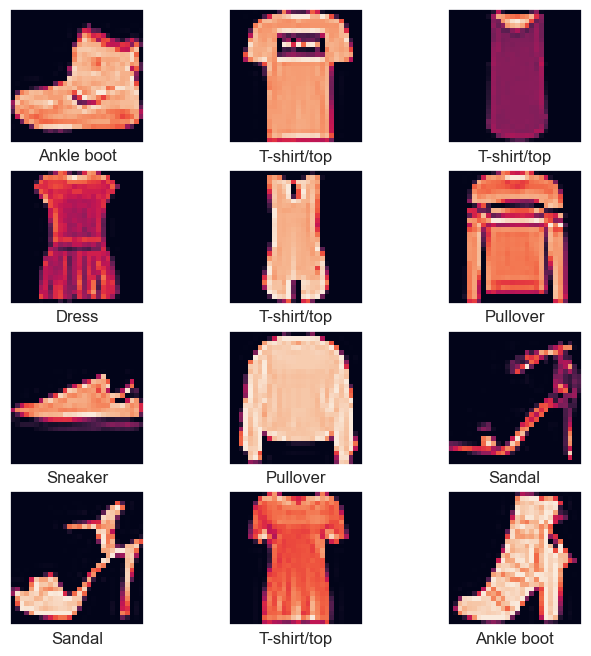

In [88]:
def show_image(image, label):
    labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
            "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
    plt.figure(figsize=(8,8))
    for i in range(12):
        plt.subplot(4,3,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image[i])
        plt.xlabel(labels[label[i]])
    plt.show()

show_image(train_oscar['images'], train_y)

In [12]:
#e)Training Data preparation
from sklearn.model_selection import train_test_split
np.random.seed(17)
x_train_oscar,x_val_oscar,y_train_oscar,y_val_oscar = train_test_split(train_oscar['images'], train_oscar['labels'], train_size=0.8, random_state=17 )

In [13]:
#f)Build, Train, and Validate CNN Model
cnn_model_oscar = Sequential()
cnn_model_oscar.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model_oscar.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_oscar.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn_model_oscar.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_oscar.add(Flatten())
cnn_model_oscar.add(Dense(100, activation='relu'))
cnn_model_oscar.add(Dense(10, activation='softmax'))

In [14]:
cnn_model_oscar.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [15]:
cnn_model_oscar.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 100)               8

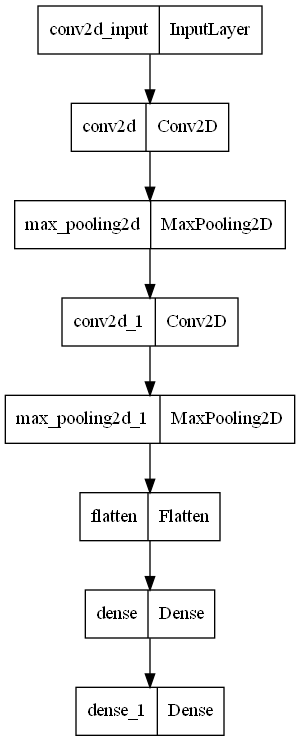

In [16]:
from keras.utils import plot_model
plot_model(cnn_model_oscar, to_file='model.png')

In [19]:
cnn_history_oscar = cnn_model_oscar.fit(x_train_oscar, y_train_oscar, batch_size=256, epochs=8, validation_data=(x_val_oscar, y_val_oscar))          

Epoch 1/8
188/188 [==============================] - 22s 115ms/step - loss: 0.2717 - accuracy: 0.9022 - val_loss: 0.2843 - val_accuracy: 0.8993
Epoch 2/8
188/188 [==============================] - 20s 109ms/step - loss: 0.2622 - accuracy: 0.9049 - val_loss: 0.2839 - val_accuracy: 0.8992
Epoch 3/8
188/188 [==============================] - 21s 114ms/step - loss: 0.2538 - accuracy: 0.9077 - val_loss: 0.2780 - val_accuracy: 0.9007
Epoch 4/8
188/188 [==============================] - 20s 108ms/step - loss: 0.2447 - accuracy: 0.9110 - val_loss: 0.2696 - val_accuracy: 0.9038
Epoch 5/8
188/188 [==============================] - 21s 112ms/step - loss: 0.2364 - accuracy: 0.9135 - val_loss: 0.2741 - val_accuracy: 0.9022
Epoch 6/8
188/188 [==============================] - 22s 115ms/step - loss: 0.2312 - accuracy: 0.9153 - val_loss: 0.2580 - val_accuracy: 0.9100
Epoch 7/8
188/188 [==============================] - 22s 115ms/step - loss: 0.2220 - accuracy: 0.9178 - val_loss: 0.2559 - val_accuracy:

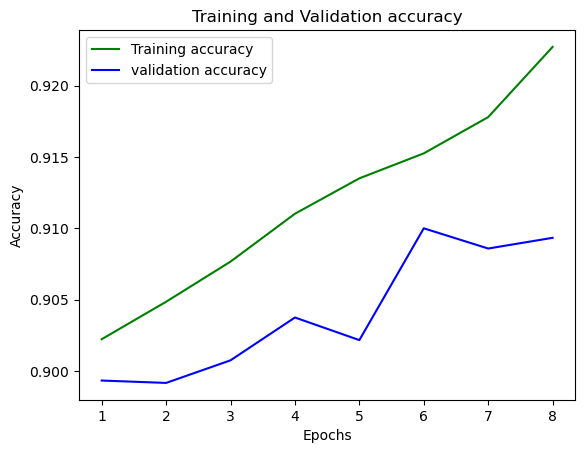

In [22]:
#g)Test and analyze the model

loss_train = cnn_history_oscar.history['accuracy']
loss_val = cnn_history_oscar.history['val_accuracy']
epochs = range(1,9)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [97]:
test_loss, test_acc = cnn_model_oscar.evaluate(train_oscar['images'], train_oscar['labels'], verbose=2)
print("Test accuracy:", test_acc)

1875/1875 - 8s - loss: 0.2153 - accuracy: 0.9225 - 8s/epoch - 4ms/step
Test accuracy: 0.9224833250045776


In [24]:
val_loss, val_acc = cnn_model_oscar.evaluate(x_val_oscar, y_val_oscar, verbose=2)
print("Validation accuracy:", val_acc)

375/375 - 3s - loss: 0.2577 - accuracy: 0.9093 - 3s/epoch - 8ms/step
Validation accuracy: 0.909333348274231


In [25]:
cnn_predictions_oscar = cnn_model_oscar.predict(test_oscar['images'])

313/313 [==============================] - 3s 8ms/step


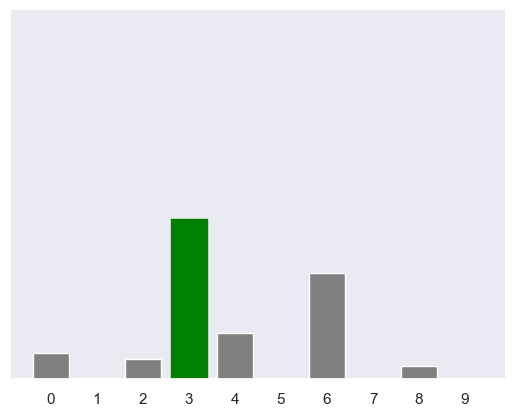

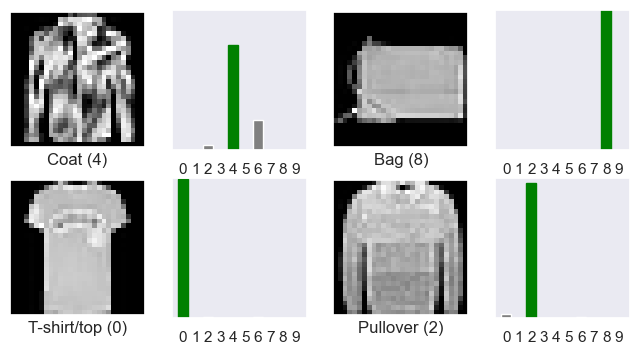

          Confusion Matrix 
[[884   0  19  15   6   0  71   0   5   0]
 [  1 981   0  13   2   0   1   0   2   0]
 [ 15   2 865   6  62   0  48   0   2   0]
 [ 22   8  15 868  48   0  36   0   3   0]
 [  1   1  68  11 870   0  48   0   1   0]
 [  0   0   0   1   0 980   0   9   0  10]
 [130   4  82  10  74   0 689   0  11   0]
 [  0   0   0   0   0  30   0 915   1  54]
 [  6   0   8   1   1   1   0   3 979   1]
 [  0   0   0   0   0   5   1  15   0 979]]

                  Classification Report 
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.88      0.86      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.82      0.86      0.84      1000
       Dress       0.94      0.87      0.90      1000
        Coat       0.82      0.87      0.84      1000
      Sandal       0.96      0.98      0.97      1000
       Shirt       0.77      0.69      0.73      1000
     Sneaker       0.97      0.92      0.94      1000
         Bag

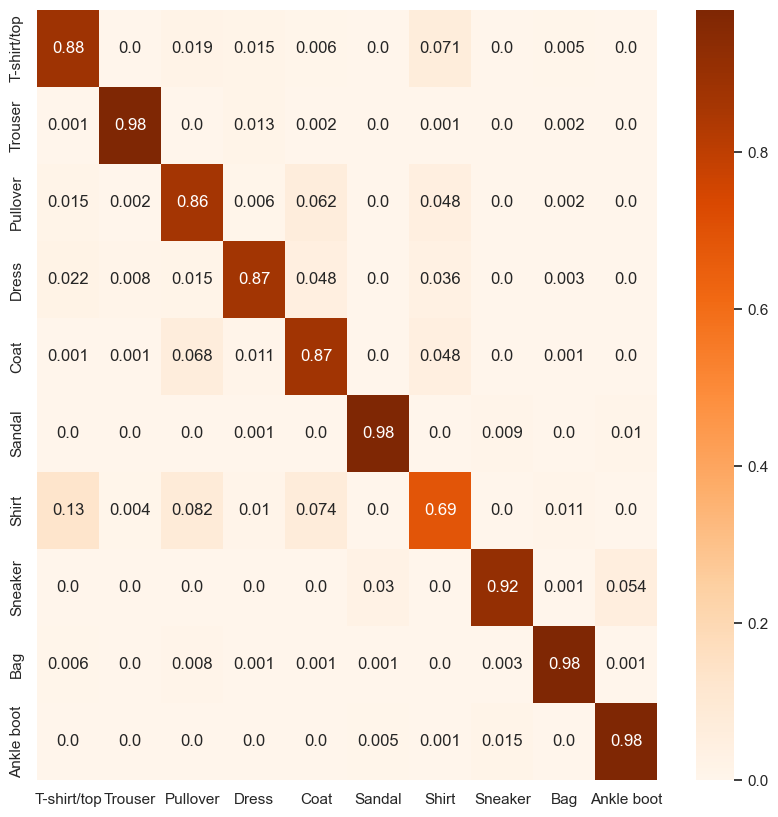

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               80384     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


Epoch 1/8
188/188 [==============================] - 30s 132ms/step - loss: 0.8118 - accuracy: 0.7042 - val_loss: 0.5405 - val_accuracy: 0.8051
Epoch 2/8
188/188 [==============================] - 24s 127ms/step - loss: 0.4988 - accuracy: 0.8159 - val_loss: 0.4599 - val_accuracy: 0.8330
Epoch 3/8
188/188 [==============================] - 24s 129ms/step - loss: 0.4438 - accuracy: 0.8375 - val_loss: 0.4381 - val_accuracy: 0.8298
Epoch 4/8
188/188 [==============================] - 25s 132ms/step - loss: 0.4119 - accuracy: 0.8481 - val_loss: 0.4043 - val_accuracy: 0.8513
Epoch 5/8
188/188 [==============================] - 24s 126ms/step - loss: 0.3884 - accuracy: 0.8560 - val_loss: 0.3785 - val_accuracy: 0.8574
Epoch 6/8
188/188 [==============================] - 23s 124ms/step - loss: 0.3731 - accuracy: 0.8625 - val_loss: 0.3723 - val_accuracy: 0.8621
Epoch 7/8
188/188 [==============================] - 24s 125ms/step - loss: 0.3535 - accuracy: 0.8708 - val_loss: 0.3503 - val_accuracy:

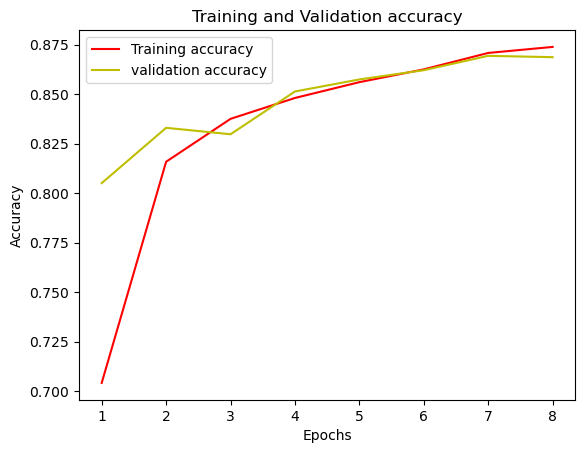

313/313 - 5s - loss: 0.3778 - accuracy: 0.8628 - 5s/epoch - 17ms/step
Test accuracy: 0.8628000020980835


375/375 - 6s - loss: 0.3513 - accuracy: 0.8687 - 6s/epoch - 17ms/step
Validation accuracy: 0.8686666488647461


313/313 [==============================] - 7s 18ms/step


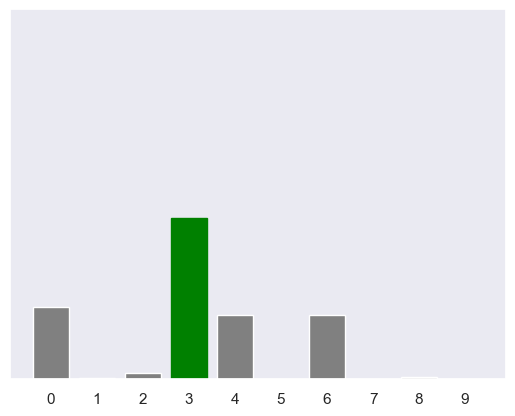

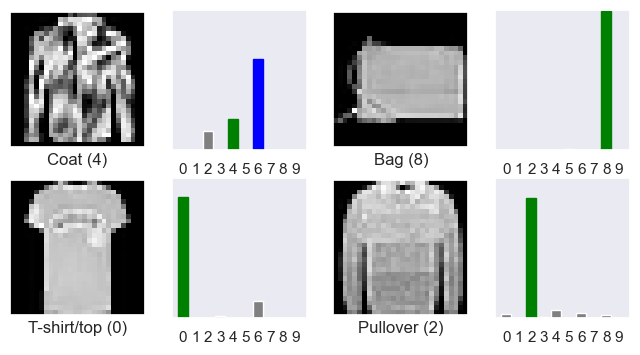

          Confusion Matrix 
[[831   4  16  42   5   2  94   0   6   0]
 [  5 955   2  29   4   0   3   0   2   0]
 [ 13   1 745  14 150   0  73   0   4   0]
 [ 23   6  11 905  31   1  21   0   2   0]
 [  3   1  64  39 842   0  49   0   2   0]
 [  0   0   0   1   0 967   0  20   1  11]
 [166   3  70  35 106   1 606   0  13   0]
 [  0   0   0   0   0  77   0 876   0  47]
 [  2   0   7   7   3  11   2   5 962   1]
 [  1   0   0   0   0  24   0  35   1 939]]

                  Classification Report 
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.83      0.81      1000
     Trouser       0.98      0.95      0.97      1000
    Pullover       0.81      0.74      0.78      1000
       Dress       0.84      0.91      0.87      1000
        Coat       0.74      0.84      0.79      1000
      Sandal       0.89      0.97      0.93      1000
       Shirt       0.71      0.61      0.66      1000
     Sneaker       0.94      0.88      0.90      1000
         Bag

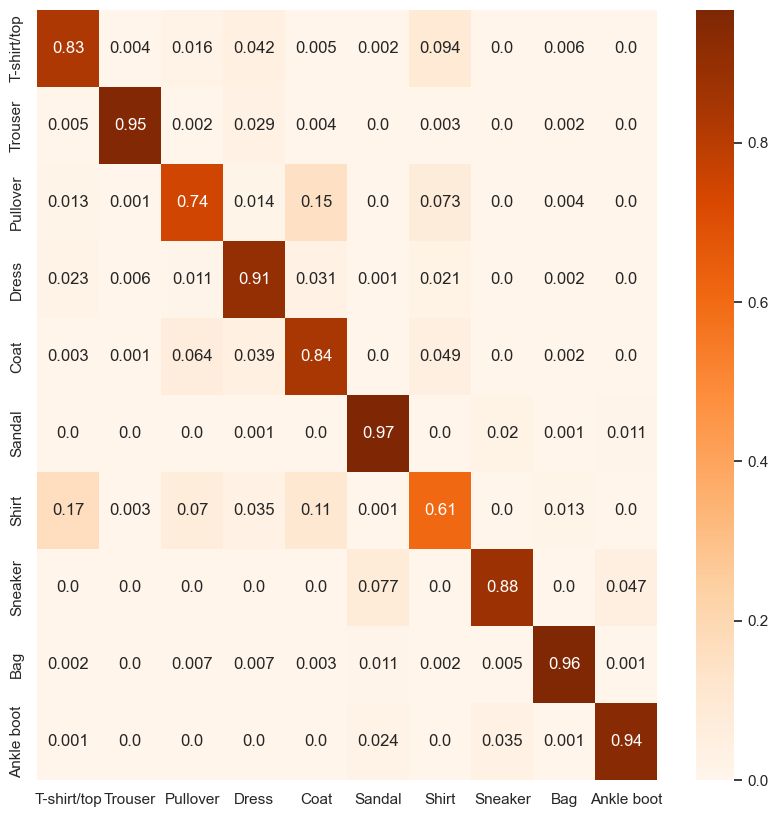